In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import seaborn as sns

# Loading the data

For the character names and linguistic features extraction pipeline, please refer to `extract_character_attributes.ipynb`. And for the clusterization pipeline as well as the different clustering methods comparison refer to `clustering.ipynb`.

In [32]:
characters =  pd.read_csv(
    'data/character_clusters.csv', 
    index_col=0,
    converters={
        "adj": lambda x: x.strip("[]").replace("'","").split(", "), # need this to read list columns from csv
        "active": lambda x: x.strip("[]").replace("'","").split(", "),
        "patient": lambda x: x.strip("[]").replace("'","").split(", ")
        }
    )
characters.head()

,wiki_id,character,adj,active,patient,cluster
0,31186339,Peeta Mellark,[son],"[take, reveal, mean, form, present, beg, tell]",[force],29
1,31186339,Cato,[],[kill],"[encounter, wound, shoot]",55
2,31186339,Katniss,[],"[take, survive, drop, warn, run, shoot, presen...","[give, find, torment, spare, force, tell, warn]",2
3,31186339,Rue,[die],"[draw, care, draw, trap]","[hear, stab, comfort, kill]",1
4,31186339,Seneca Crane,[Gamemaker],"[change, lock]","[summon, convince]",1


In [33]:
movies = pd.read_csv(
    'data/MovieSummaries/movie.metadata.tsv', 
    sep='\t', 
    names=['wiki_id', 'freebase_id', 'title', 'release_date', 'revenue', 'runtime', 'languages', 'countries', 'genres']
)
movies.head()

,wiki_id,freebase_id,title,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [34]:
df_charac = pd.read_csv(
    'data/MovieSummaries/character.metadata.tsv', 
    sep='\t', 
    names=['wiki_id', 'freebase_id', 'release_date', 'character', 'date_of_birth', 'sex', 'height', '.','actor','age','character_map','..','...','....']
)
df_charac.head()

,wiki_id,freebase_id,release_date,character,date_of_birth,sex,height,.,actor,age,character_map,..,...,....
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,NaN
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,NaN
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,NaN


In [35]:
characters_and_movies = characters.merge(movies, how='left', on='wiki_id').dropna()
characters_and_movies.head()

,wiki_id,character,adj,active,patient,cluster,freebase_id,title,release_date,revenue,runtime,languages,countries,genres
0,31186339,Peeta Mellark,[son],"[take, reveal, mean, form, present, beg, tell]",[force],29,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
1,31186339,Cato,[],[kill],"[encounter, wound, shoot]",55,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,31186339,Katniss,[],"[take, survive, drop, warn, run, shoot, presen...","[give, find, torment, spare, force, tell, warn]",2,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
3,31186339,Rue,[die],"[draw, care, draw, trap]","[hear, stab, comfort, kill]",1,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
4,31186339,Seneca Crane,[Gamemaker],"[change, lock]","[summon, convince]",1,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."


In [36]:
characters_and_movies[characters_and_movies['title'].str.contains("Batman")][['title', 'character', 'cluster']]

,title,character,cluster
6348,Superman/Batman: Apocalypse,Superman,42
6349,Superman/Batman: Apocalypse,Batman,42
6350,Superman/Batman: Apocalypse,Barda,30
6351,Superman/Batman: Apocalypse,Kara,42
6352,Superman/Batman: Apocalypse,Darkseid,23
...,...,...,...
69321,Batman Forever,Riddler,42
69322,Batman Forever,Batman,42
69323,Batman Forever,Edward Nygma,56
69324,Batman Forever,Bruce Wayne,41


# Initial analysis of the actors' success

In [37]:
map_dict_to_list = lambda x: [value for key, value in eval(x).items()]
movies['languages'] = movies['languages'].apply(map_dict_to_list)
movies['countries'] = movies['countries'].apply(map_dict_to_list)
movies['genres'] = movies['genres'].apply(map_dict_to_list)
movies.head()

,wiki_id,freebase_id,title,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


Determine which character bring in the most money


In [57]:
# Merge the two datas
df_merged = df_charac.merge(movies, on=['wiki_id'], how='inner')

# Clean data of movies without box offic revenue
df_merged = df_merged.dropna(subset=['revenue'])

# Determine the actor and sum the box office revenue
actor_totalRevenue = df_merged.groupby(['actor'])['revenue'].agg(['sum', 'count']).reset_index()
actor_totalRevenue.columns = ['actor', 'bo_revenue', 'Actor Count']

# Sort the actor_revenue DataFrame in descending order
actor_revenue_sort = actor_totalRevenue.sort_values(by='bo_revenue', ascending=False)

#Extract only the top 20 best actors
actor_top20 = actor_revenue_sort.head(20)

# Merge the top 20 actors with original datas
top20_actor_data = actor_top20.merge(df_merged[['actor', 'languages','sex']], on='actor', how='left')
top20_actor_data = top20_actor_data.drop_duplicates(subset = ['actor'])
top20_actor_data.head()

,actor,bo_revenue,Actor Count,languages,sex
0,Warwick Davis,1.293016e+10,19,"[Croatian language, English Language]",M
19,Samuel L. Jackson,1.278943e+10,72,"[Russian Language, English Language]",M
91,Frank Welker,1.028744e+10,61,"[English Language, Spanish Language]",M
152,Alan Rickman,1.020871e+10,29,"[Croatian language, English Language]",M
181,Robbie Coltrane,1.009465e+10,30,"[Croatian language, English Language]",M


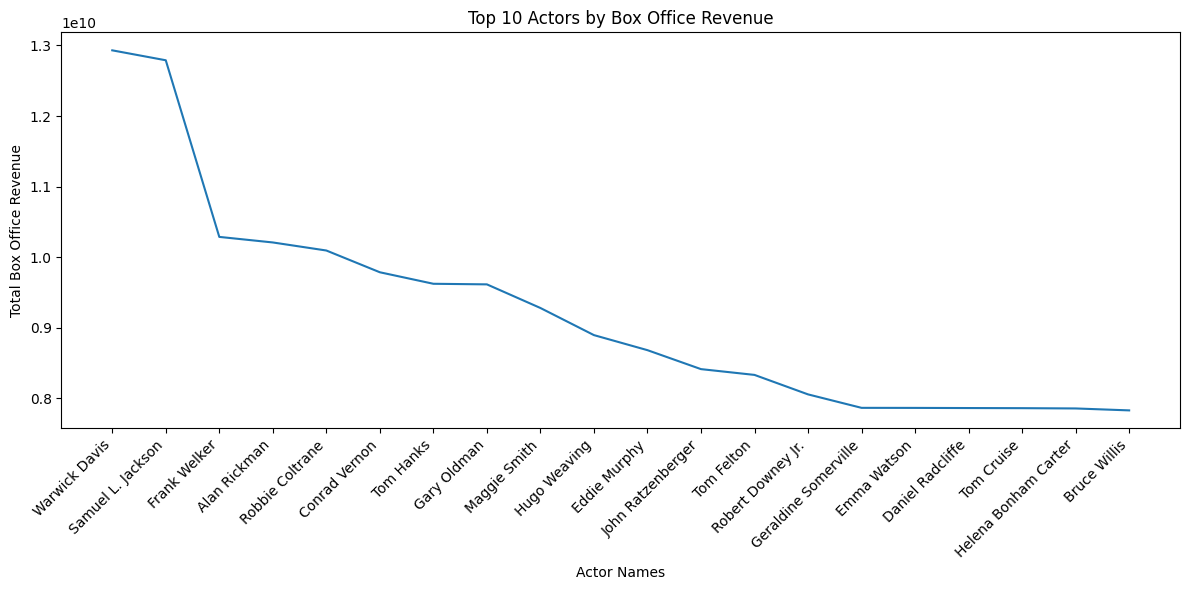

In [58]:
# Plot the data above
actor_names = top20_actor_data['actor']
revenues_total = top20_actor_data['bo_revenue']

plt.figure(figsize=(12, 6))
plt.plot(actor_names, revenues_total)
plt.xlabel('Actor Names')
plt.ylabel('Total Box Office Revenue')
plt.title('Top 10 Actors by Box Office Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

plt.tight_layout()
plt.show()



In the data above, we are ranking the actors according to the box office revenue of the movies they acted in.

Study the main lead actors obtaining the highest revenue

In [59]:
def calculater_importance(x):
    a = 0
    for w in x["adj"]:
        a += w.isalpha()
    for w in x["active"]:
        a += w.isalpha()
    for w in x["patient"]:
        a += w.isalpha()
    return a

characters['importance'] = characters.apply(calculater_importance, axis=1)

characters_with_importance = characters[['wiki_id', 'character', 'importance']]
characters_with_importance.head()

,wiki_id,character,importance
0,31186339,Peeta Mellark,9
1,31186339,Cato,4
2,31186339,Katniss,18
3,31186339,Rue,9
4,31186339,Seneca Crane,5


In [60]:
characters_with_importance['importance_share'] = characters_with_importance['importance'] / characters_with_importance.groupby('wiki_id')['importance'].transform('sum')
characters_with_importance['is_important'] = characters_with_importance['importance_share'] >= 0.2
characters_with_importance.sample(10)

/tmp/ipykernel_20292/1073324314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  characters_with_importance['importance_share'] = characters_with_importance['importance'] / characters_with_importance.groupby('wiki_id')['importance'].transform('sum')
/tmp/ipykernel_20292/1073324314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  characters_with_importance['is_important'] = characters_with_importance['importance_share'] >= 0.2


,wiki_id,character,importance,importance_share,is_important
28888,3242877,Rodriguez,3,0.115385,False
25299,4664724,Jess,12,0.600000,True
67200,20506905,Clifford,3,0.020690,False
44618,29783609,Darcy,7,0.189189,False
49433,15422381,Bruno Leardi,3,0.214286,True
34410,461322,Benny,3,0.111111,False
63109,3650653,Wart,17,0.278689,True
55602,18513660,Egon Schiele,10,1.000000,True
62266,28219052,Nilaa,3,1.000000,True
13900,13881749,Cartman,6,0.206897,True


In [63]:
df_charac_actor = df_merged[['wiki_id', 'character','actor','revenue']]

# Include characters and actors together in the same dataset
character_actor = df_charac_actor.merge(characters_with_importance, on=['wiki_id', 'character'], how='left')

# Merge only the main charac of movies\n",
main_character = character_actor[character_actor['is_important'] == True]

#Add up the Box office revenue and count the occurance of movie appearance
main_charac_mergedBOR = main_character.groupby(['actor'])['revenue'].agg(['sum', 'count']).reset_index()

main_charac_sort = main_charac_mergedBOR.sort_values(by='sum', ascending=False)

main_charac_top20 = main_charac_sort.head(20)
main_charac_top20.head()

,actor,sum,count
2263,Tom Cruise,5.690064e+09,19
520,Daniel Radcliffe,5.058613e+09,6
2265,Tom Hanks,4.577922e+09,18
1409,Leonardo DiCaprio,4.059193e+09,8
1595,Mel Gibson,4.048504e+09,22


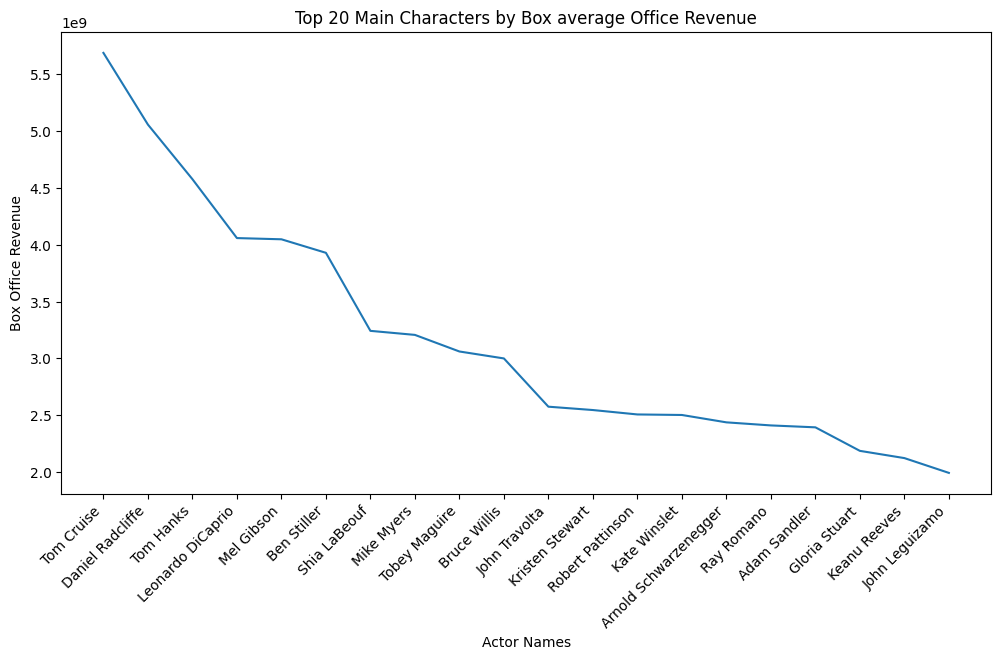

In [64]:
# Plot the charts for main actors\n",
main_charac_top20_names = main_charac_top20['actor']
main_charac_revenue = main_charac_top20['sum']

plt.figure(figsize=(12, 6))
plt.plot(main_charac_top20_names,main_charac_revenue)
plt.xlabel('Actor Names')
plt.ylabel('Box Office Revenue')
plt.title('Top 20 Main Characters by Box average Office Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

plt.show()

Male or female perform better in generating box office revenue?

In [ ]:
gender_actor_data = actor_revenue_sort.merge(df_charac[['actor', 'sex']], on='actor', how='left')
gender_actor_data = gender_actor_data.drop_duplicates(subset = ['actor'])
gender_actor_data.head()

,actor,bo_revenue,Actor Count,sex
0,Warwick Davis,1.293016e+10,19,M
31,Samuel L. Jackson,1.278943e+10,72,M
137,Frank Welker,1.028744e+10,61,M
320,Alan Rickman,1.020871e+10,29,M
362,Robbie Coltrane,1.009465e+10,30,M


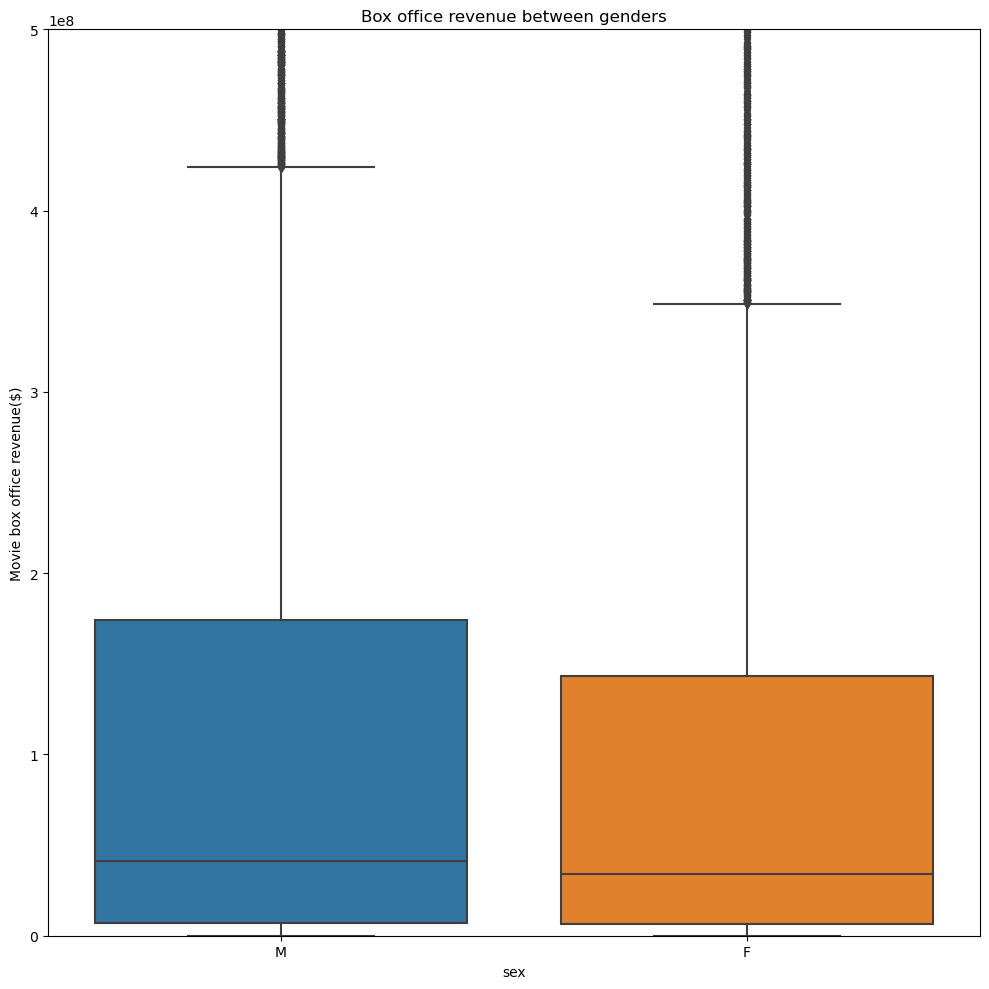

In [ ]:
# Include gender into the data for box plot aalysis
gender_actor_data = actor_revenue_sort.merge(df_charac[['actor', 'sex']], on='actor', how='left')
gender_actor_data = gender_actor_data.drop_duplicates(subset = ['actor'])

# Box plot for revenue between genders
plt.figure(figsize=(10, 10))
gender_boxplot = sns.boxplot(x="sex", y="bo_revenue", data=gender_actor_data.loc[gender_actor_data['sex'].isin(['M','F'])])

# Set labels
plt.ylabel("Movie box office revenue($)")
plt.title("Box office revenue between genders")
plt.ylim(0, 500000000)
          
#Show plot
plt.tight_layout()
plt.show()

# Given the variance and the 25th percentile, 75th percentile and medan, male actors drive higher box office revenue."

Study the language used in top 50 films / Which language drive the highest revenue?

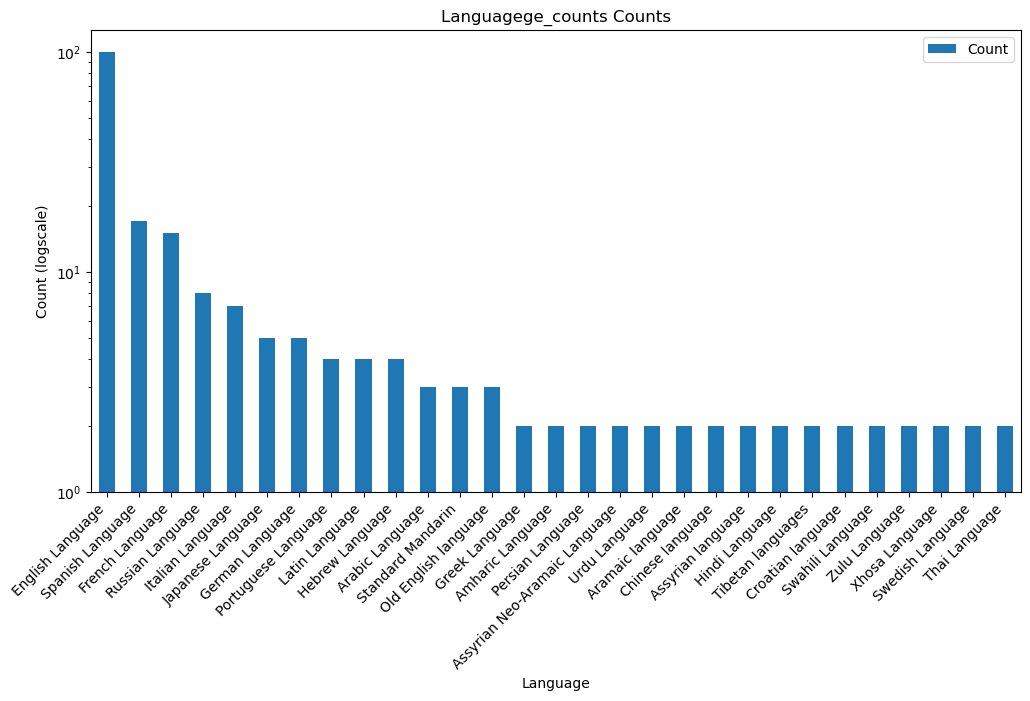

In [ ]:
# Extract the top 100 movies
film_sort = df_merged[['countries','languages','revenue','wiki_id_x']]
film_sort = film_sort.drop_duplicates(subset = ['wiki_id_x'])
film_sort = film_sort.sort_values(by='revenue', ascending=False)
top100film = film_sort.head(100)

# Split the language into new data frames\
df_split_languages = top100film.explode('languages')

# Count the occurance of the languages
language_counts = df_split_languages['languages'].value_counts()
df_language_counts = pd.DataFrame({'Language': language_counts.index, 'Count': language_counts.values})

# Plot the data
df_language_counts.plot(kind='bar', x='Language', y='Count', figsize=(12, 6),log=True)
plt.title('Languagege_counts Counts')
plt.xlabel('Language')
plt.ylabel('Count (logscale)')
plt.xticks(rotation=45, ha='right')
plt.show()

Study the genre of movies that earn the highest revenue.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Thriller'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Action/Adventure'),
  Text(6, 0, 'Fantasy'),
  Text(7, 0, 'Romance Film'),
  Text(8, 0, 'Family Film'),
  Text(9, 0, 'Science Fiction')])

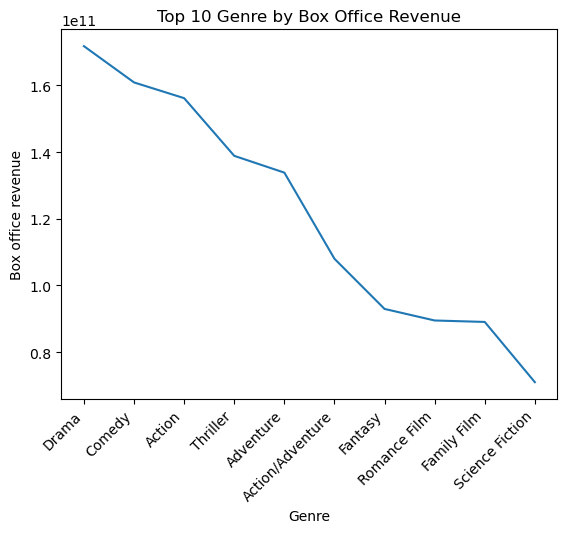

In [ ]:
#Clean data to remove repeated movies
df_clean_split_genres = df_merged[['title','genres','revenue','wiki_id_x']]
df_clean_split_genres = df_clean_split_genres.drop_duplicates(subset = ['wiki_id_x'])

# Split the genre into new data frames
df_split_genre = df_clean_split_genres.explode('genres')[['title', 'revenue', 'genres']]

# Determine the actor and sum the box office revenue
genre_totalRevenue = df_split_genre.groupby('genres')['revenue'].sum().reset_index()

# Sort the BOR in ascending order
genre_totalRevenue = genre_totalRevenue.sort_values(by='revenue', ascending=False)
genre_totalRevenue_top10 = genre_totalRevenue.head(10)

genre = genre_totalRevenue_top10['genres']
genreRevenue = genre_totalRevenue_top10['revenue']

#Plot the charts
plt.plot(genre, genreRevenue)
plt.xlabel('Genre')
plt.ylabel('Box office revenue')
plt.title('Top 10 Genre by Box Office Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

# Genre prediction using clusters

# Revenue prediction using clusters